# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

In [1]:
# Checking whether the notebook is on Colab or PC

import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

In [2]:
# Mounting myDrive if on colab

if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


In [3]:
# Noticing user about files that has to be in the current working directory

def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

In [5]:
os.getcwd()

'/gdrive'

In [22]:
# Installations and importations required for Google Colab version

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')

# from P4_functions import *

In [23]:
# # Installations and importations required for Google Colab version

import os

if is_colab==True:
    !pip install -r requirements.txt

else:
    # make sure 'requirements.txt' is in the current working directory
    file_required('requirements.txt')
    !pip install -r requirements.txt

In [24]:
## IMPORTATIONS

import os
import io
import re
import simplejson as json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'
from ipywidgets import interact, interact_manual

import missingno as msno

In [378]:
# Setting pandas display options

dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

In [28]:
# !pip install gtts
! pip freeze > requirements.txt

In [30]:
# To play audio text-to-speech during execution

from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [31]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [37]:
os.getcwd()

'/gdrive/My Drive/--DATA SCIENCE/PROJET4'

In [239]:
if is_colab==True:
    path_csv_1 = 'DATA/2015-building-energy-benchmarking.csv' 
    path_csv_2 = 'DATA/2016-building-energy-benchmarking.csv'
    path_json_1 = 'DATA/datasets_34249_1051576_socrata_metadata_2015-building-energy-benchmarking.json'
    path_json_2 = 'DATA/datasets_34249_1051576_socrata_metadata_2016-building-energy-benchmarking.json'
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv_1 = '../DATA/2015-building-energy-benchmarking.csv'
    path_csv_2 = '../DATA/2016-building-energy-benchmarking.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df_2015 = pd.read_csv(path_csv_1, sep=',',
                 low_memory=True, encoding ='utf-8')
df_2016 = pd.read_csv(path_csv_2, sep=',',
                 low_memory=True, encoding ='utf-8')
# json_str_2015 = pd.read_csv(path_json_1, sep=',',
#                  low_memory=True, encoding ='utf-8')


print("-----> importation of .csv  and .jsonfiles in notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv  and .jsonfiles in notebook OK


Importing metadata in python dictionnary

In [240]:
json_dict_2015 = json.loads(open(path_json_1, "rt").read())
json_dict_2016 = json.loads(open(path_json_2, "rt").read())

In [59]:
df_2015.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [61]:
df_2016.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
speak('Datasets successfully imported')

### 0.2 First Overview

First description of the data

In [63]:
desc_2015 = df_2015.describe(include='all')
desc_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.00,3340.00,3340,3340,3340,3338,3340,3340.00,3340,3340.00,3340.00,3332.00,3340.00,3340.00,3340.00,3213,3204,3204.00,1559,1559.00,560,560.00,110,2560.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3339,13,3340,84,224.00,3338.00,213.00,3338.00,3340.00
unique,nan,nan,7,27,3287,3245,3298,nan,13,nan,nan,nan,nan,nan,nan,442,56,nan,47,nan,41,nan,61,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,13,2,2,nan,nan,nan,nan,nan
top,nan,nan,NonResidential,Low-Rise Multifa...,WAREHOUSE,2400002,{'latitude': '47...,nan,DOWNTOWN,nan,nan,nan,nan,nan,nan,Multifamily Housing,Multifamily Housing,nan,Parking,nan,Retail Store,nan,2016,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No,Under constructi...,Compliant,High Outlier,nan,nan,nan,nan,nan
freq,nan,nan,1461,998,9,5,5,nan,578,nan,nan,nan,nan,nan,nan,862,1598,nan,881,nan,107,nan,20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2791,1,3337,46,nan,nan,nan,nan,nan
mean,20522.17,2015.00,NaN,NaN,NaN,NaN,NaN,4.45,NaN,1967.62,1.04,4.68,90772.89,11054.03,79718.86,NaN,NaN,74881.54,NaN,27675.65,NaN,10755.71,NaN,67.89,53.63,57.59,132.78,138.94,4983106.05,5203054.86,250285.08,1017897.22,3473209.38,12533.04,1253304.19,7142.30,110.09,0.99,NaN,NaN,NaN,NaN,123.06,32.38,1.35,24.83,18786.68
std,11511.52,0.00,NaN,NaN,NaN,NaN,NaN,2.13,NaN,32.95,0.78,5.46,149305.81,35296.33,129231.44,NaN,NaN,123624.86,NaN,52480.84,NaN,22618.53,NaN,27.15,53.89,55.60,131.94,131.36,13753302.35,14007566.32,3481900.06,2789930.77,9519638.97,44151.42,4415142.22,196279.00,409.45,1.64,NaN,NaN,NaN,NaN,5.81,19.91,0.48,15.01,588.60
min,1.00,2015.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,1900.00,1.00,0.00,20000.00,-3.00,-50550.00,NaN,NaN,5872.00,NaN,0.00,NaN,0.00,NaN,1.00,0.00,0.00,-2.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,116.00,1.00,1.00,1.00,17916.00
25%,19921.75,2015.00,NaN,NaN,NaN,NaN,NaN,3.00,NaN,1947.00,1.00,2.00,28487.00,0.00,26683.00,NaN,NaN,25000.00,NaN,4959.00,NaN,2385.25,NaN,51.75,27.30,29.70,73.50,80.30,913930.00,988324.75,0.00,186490.75,636332.25,0.00,0.00,0.00,9.27,0.08,NaN,NaN,NaN,NaN,117.00,14.00,1.00,10.00,18379.00
50%,22977.00,2015.00,NaN,NaN,NaN,NaN,NaN,4.00,NaN,1973.00,1.00,4.00,43855.00,0.00,41326.00,NaN,NaN,39000.00,NaN,10600.00,NaN,5019.50,NaN,76.00,37.40,40.90,95.00,102.80,1776219.00,1953996.50,0.00,340032.00,1160236.00,2945.50,294577.00,0.00,32.74,0.46,NaN,NaN,NaN,NaN,123.00,33.00,1.00,26.00,18390.00
75%,25748.00,2015.00,NaN,NaN,NaN,NaN,NaN,7.00,NaN,1996.00,1.00,5.00,88428.00,4304.25,78726.00,NaN,NaN,72067.50,NaN,26224.50,NaN,10275.00,NaN,90.00,59.88,65.57,143.90,151.28,4044277.00,4368461.75,0.00,806193.50,2750847.25,11153.25,1115365.75,0.00,88.64,1.18,NaN,NaN,NaN,NaN,125.50,50.00,2.00,38.00,19576.00


In [64]:
desc_2016 = df_2016.describe(include='all')
desc_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.00,3376.00,3376,3376,3376,3376,3376,3376,3360.00,3376,3376.00,3376,3376.00,3376.00,3376.00,3368.00,3376.00,3376.00,3376.00,3376.00,3367,3356,3356.00,1679,1679.00,596,596.00,119,2533.00,3369.00,3370.00,3367.00,3367.00,3371.00,3370.00,3367.00,3367.00,3367.00,3367.00,3367.00,3376,0.00,3376,32,3367.00,3367.00
unique,nan,nan,8,24,3362,3354,1,1,nan,3268,nan,19,nan,nan,nan,nan,nan,nan,nan,nan,466,56,nan,50,nan,44,nan,65,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,4,2,nan,nan
top,nan,nan,NonResidential,Low-Rise Multifa...,Northgate Plaza,309 South Clover...,Seattle,WA,nan,1625049001,nan,DOWNTOWN,nan,nan,nan,nan,nan,nan,nan,nan,Multifamily Housing,Multifamily Housing,nan,Parking,nan,Retail Store,nan,2016,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,Compliant,Low outlier,nan,nan
freq,nan,nan,1460,987,3,4,3376,3376,nan,8,nan,573,nan,nan,nan,nan,nan,nan,nan,nan,866,1667,nan,976,nan,110,nan,14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3263,nan,3211,23,nan,nan
mean,21208.99,2016.00,NaN,NaN,NaN,NaN,NaN,NaN,98116.95,NaN,4.44,NaN,47.62,-122.33,1968.57,1.11,4.71,94833.54,8001.53,86832.01,NaN,NaN,79177.64,NaN,28444.08,NaN,11738.68,NaN,67.92,54.73,57.03,134.23,137.78,5403667.29,5276725.71,274595.90,1086638.97,3707612.16,13685.05,1368504.54,NaN,nan,NaN,NaN,119.72,1.18
std,12223.76,0.00,NaN,NaN,NaN,NaN,NaN,NaN,18.62,NaN,2.12,NaN,0.05,0.03,33.09,2.11,5.49,218837.61,32326.72,207939.81,NaN,NaN,201703.41,NaN,54392.92,NaN,29331.20,NaN,26.87,56.27,57.16,139.29,139.11,21610628.63,15938786.48,3912173.39,4352478.36,14850656.14,67097.81,6709780.83,NaN,nan,NaN,NaN,538.83,1.82
min,1.00,2016.00,NaN,NaN,NaN,NaN,NaN,NaN,98006.00,NaN,1.00,NaN,47.50,-122.41,1900.00,0.00,0.00,11285.00,0.00,3636.00,NaN,NaN,5656.00,NaN,0.00,NaN,0.00,NaN,1.00,0.00,0.00,0.00,-2.10,0.00,0.00,0.00,-33826.80,-115417.00,0.00,0.00,NaN,nan,NaN,NaN,-0.80,-0.02
25%,19990.75,2016.00,NaN,NaN,NaN,NaN,NaN,NaN,98105.00,NaN,3.00,NaN,47.60,-122.35,1948.00,1.00,2.00,28487.00,0.00,27756.00,NaN,NaN,25094.75,NaN,5000.00,NaN,2239.00,NaN,53.00,27.90,29.40,74.70,78.40,925128.59,970182.23,0.00,187422.95,639487.00,0.00,0.00,NaN,nan,NaN,NaN,9.50,0.21
50%,23112.00,2016.00,NaN,NaN,NaN,NaN,NaN,NaN,98115.00,NaN,4.00,NaN,47.62,-122.33,1975.00,1.00,4.00,44175.00,0.00,43216.00,NaN,NaN,39894.00,NaN,10664.00,NaN,5043.00,NaN,75.00,38.60,40.90,96.20,101.10,1803753.25,1904452.00,0.00,345129.91,1177583.00,3237.54,323754.00,NaN,nan,NaN,NaN,33.92,0.61
75%,25994.25,2016.00,NaN,NaN,NaN,NaN,NaN,NaN,98122.00,NaN,7.00,NaN,47.66,-122.32,1997.00,1.00,5.00,90992.00,0.00,84276.25,NaN,NaN,76200.25,NaN,26640.00,NaN,10138.75,NaN,90.00,60.40,64.28,143.90,148.35,4222455.25,4381429.12,0.00,829317.84,2829632.50,11890.33,1189033.50,NaN,nan,NaN,NaN,93.94,1.37


Checking the columns

In [66]:
for i, c in enumerate(df_2015.columns):
    print('\n'+c if i % 3 == 0 else c, end=' | ')
print('\n')
for i, c in enumerate(df_2016.columns):
    print('\n'+c if i % 3 == 0 else c, end=' | ')


OSEBuildingID | DataYear | BuildingType | 
PrimaryPropertyType | PropertyName | TaxParcelIdentificationNumber | 
Location | CouncilDistrictCode | Neighborhood | 
YearBuilt | NumberofBuildings | NumberofFloors | 
PropertyGFATotal | PropertyGFAParking | PropertyGFABuilding(s) | 
ListOfAllPropertyUseTypes | LargestPropertyUseType | LargestPropertyUseTypeGFA | 
SecondLargestPropertyUseType | SecondLargestPropertyUseTypeGFA | ThirdLargestPropertyUseType | 
ThirdLargestPropertyUseTypeGFA | YearsENERGYSTARCertified | ENERGYSTARScore | 
SiteEUI(kBtu/sf) | SiteEUIWN(kBtu/sf) | SourceEUI(kBtu/sf) | 
SourceEUIWN(kBtu/sf) | SiteEnergyUse(kBtu) | SiteEnergyUseWN(kBtu) | 
SteamUse(kBtu) | Electricity(kWh) | Electricity(kBtu) | 
NaturalGas(therms) | NaturalGas(kBtu) | OtherFuelUse(kBtu) | 
GHGEmissions(MetricTonsCO2e) | GHGEmissionsIntensity(kgCO2e/ft2) | DefaultData | 
Comment | ComplianceStatus | Outlier | 
2010 Census Tracts | Seattle Police Department Micro Community Policing Plan Areas | City C

Printing total nb and percentage of null

In [69]:
def print_null_pct(df):
    tot_null = df.isna().sum().sum()
    print('nb of null: ', tot_null, '\npct of null: ',
        '{:.1f}'.format(tot_null*100/(df.shape[0]*df.shape[1])))

print_null_pct(df_2015)
print_null_pct(df_2016)

nb of null:  26512 
pct of null:  16.9
nb of null:  19952 
pct of null:  12.8


In [70]:
# Displaying number of missing values per column

def plot_export_missing(df, cols, n_file, title,
                        shorten_label=False, figsize=(12,8)):
    with plt.style.context('default'):
        fig, axs = plt.subplots(2,1)
        msno.matrix(df[cols] , sparkline=False,
                    fontsize=11, ax=axs[0])
        msno.bar(df[cols], ax=axs[1], fontsize=11)
        if shorten_label:
            for ax in axs:
                lab = [item.get_text() for item in ax.get_xticklabels()]
                short_lab = [s[:7]+'...'+s[-7:] if len(s)>14 else s for s in lab]
                ax.axes.set_xticklabels(short_lab)
    fig.set_size_inches(figsize)
    [ax.grid() for ax in axs.flatten()];
    [sns.despine(ax=ax, right=False, left=False,top=False, bottom=False)\
                                        for ax in axs.flatten()];
    plt.subplots_adjust(hspace=0.3)
    plt.tight_layout(rect=[0, 0.05, 1, 0.92])
    fig.suptitle(title, fontweight='bold', fontsize=14)
    if not os.path.exists(os.getcwd()+'/FIG'):
        os.makedirs('FIG')
    plt.savefig(os.getcwd()+'/FIG/'+n_file, dpi=400);
    plt.show()

Visualizing missing data for both dataframes

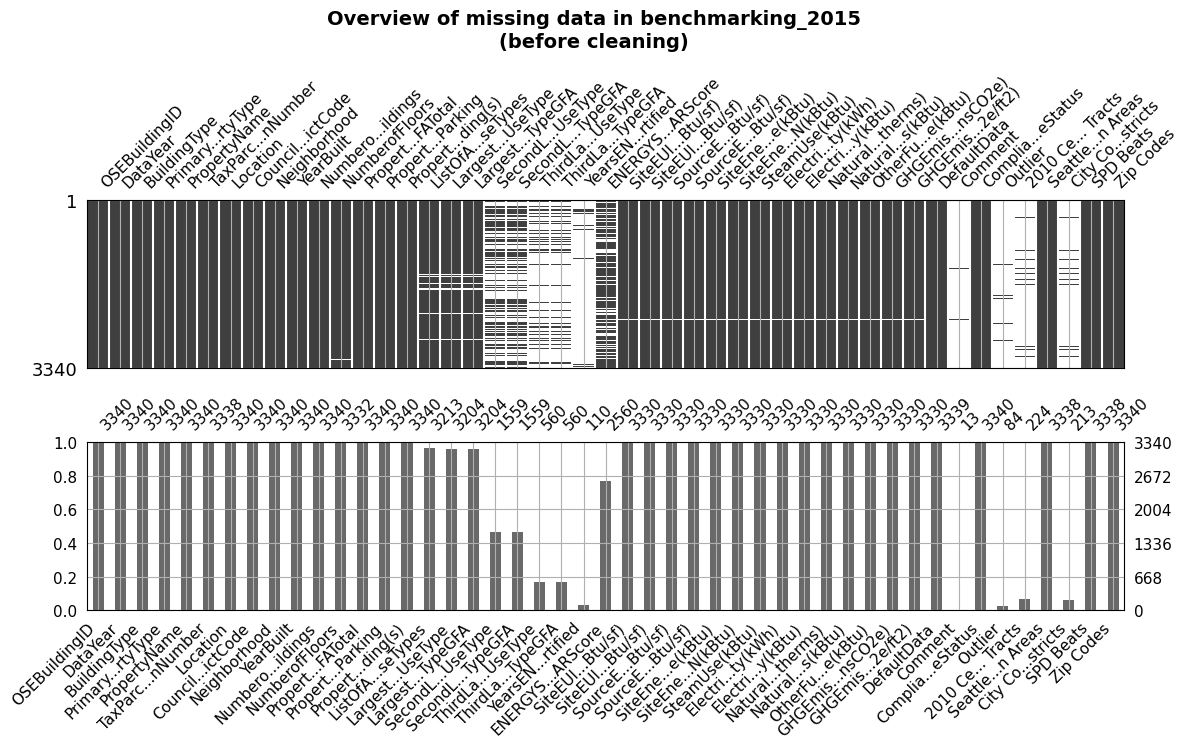

In [73]:
plot_export_missing(df_2015, df_2015.columns, 'missing_vals_2015.png',
                    'Overview of missing data in benchmarking_2015\n(before cleaning)',
                    shorten_label=True)

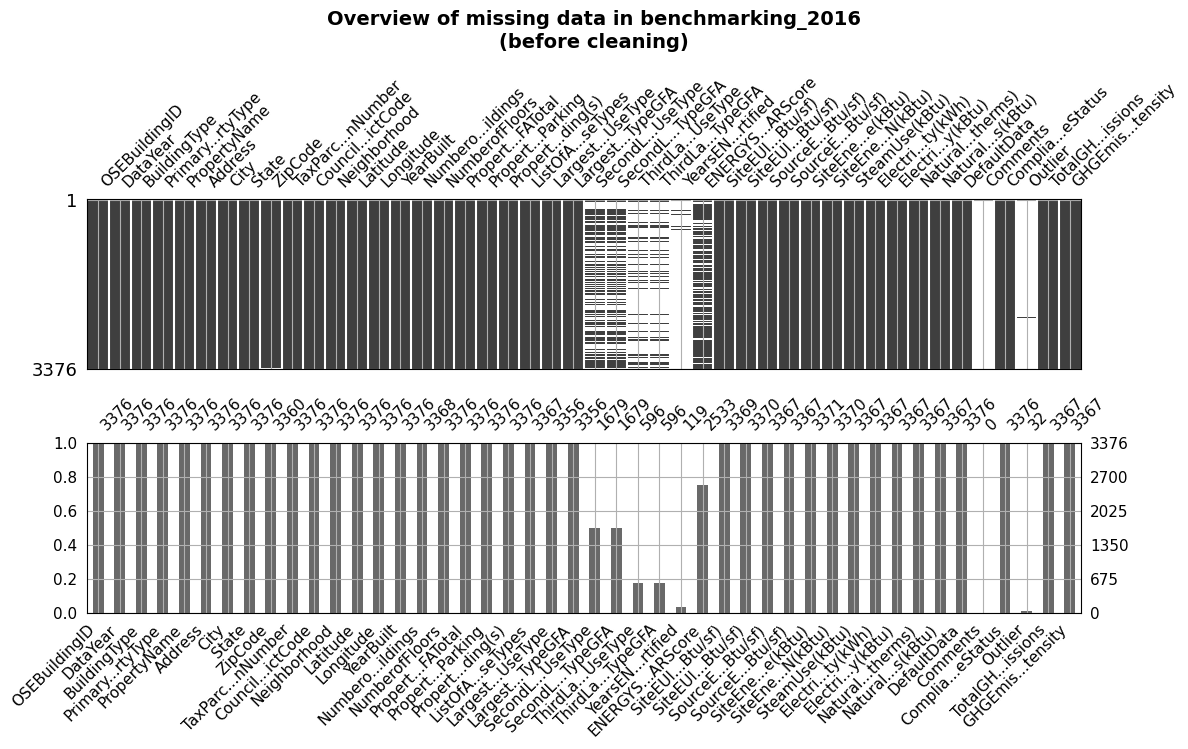

In [74]:
plot_export_missing(df_2016, df_2016.columns, 'missing_vals_2016.png',
                    'Overview of missing data in benchmarking_2016\n(before cleaning)',
                    shorten_label=True)

In [75]:
speak('Description overview done')

## 1 Data Cleaning

In [241]:
col_list = [c for c in df_2016.columns if c in df_2015.columns]
print("both in 2015 and 2016 ({}):".format(len(col_list)))
for i, c in enumerate(col_list,1):
    if i%6==1: print('')
    print(c, end=' | ')

col_list_2015 = [c for c in df_2015.columns if c not in df_2016.columns]
print("\n\nonly in 2015 ({}):".format(len(col_list_2015)))
for i, c in enumerate(col_list_2015,1):
    if i%6==1: print('')
    print(c, end=' | ')

col_list_2016 = [c for c in df_2016.columns if c not in df_2015.columns]
print("\n\nonly in 2016 ({}):".format(len(col_list_2016)))
for i, c in enumerate(col_list_2016,1):
    if i%6==1: print('')
    print(c, end=' | ')

both in 2015 and 2016 (37):

OSEBuildingID | DataYear | BuildingType | PrimaryPropertyType | PropertyName | TaxParcelIdentificationNumber | 
CouncilDistrictCode | Neighborhood | YearBuilt | NumberofBuildings | NumberofFloors | PropertyGFATotal | 
PropertyGFAParking | PropertyGFABuilding(s) | ListOfAllPropertyUseTypes | LargestPropertyUseType | LargestPropertyUseTypeGFA | SecondLargestPropertyUseType | 
SecondLargestPropertyUseTypeGFA | ThirdLargestPropertyUseType | ThirdLargestPropertyUseTypeGFA | YearsENERGYSTARCertified | ENERGYSTARScore | SiteEUI(kBtu/sf) | 
SiteEUIWN(kBtu/sf) | SourceEUI(kBtu/sf) | SourceEUIWN(kBtu/sf) | SiteEnergyUse(kBtu) | SiteEnergyUseWN(kBtu) | SteamUse(kBtu) | 
Electricity(kWh) | Electricity(kBtu) | NaturalGas(therms) | NaturalGas(kBtu) | DefaultData | ComplianceStatus | 
Outlier | 

only in 2015 (10):

Location | OtherFuelUse(kBtu) | GHGEmissions(MetricTonsCO2e) | GHGEmissionsIntensity(kgCO2e/ft2) | Comment | 2010 Census Tracts | 
Seattle Police Department M

Dropping useless columns missing in one of the two datasets

In [242]:
df_2015 = df_2015.drop(columns=['Seattle Police Department Micro Community Policing\
 Plan Areas', 'City Council Districts', 'SPD Beats',
                      '2010 Census Tracts'])
df_2016 = df_2016.drop(columns=['City' , 'State'])

Renaming the columns to harmonize 2015 and 2016 datasets.

In [243]:
rename_2015 = {'Comment': 'Comments', 'Zip Codes': 'ZipCode',
               'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
               'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'}
df_2015 = df_2015.rename(columns=rename_2015)

Splitting the 'location' column in the 2015 dataset to recreate 'Latitude', Longitude', 'Address' and 'ZipCode'.

NB: the original 'Zip Codes' column in the 2015 dataset seem to contain wrong zipcode. We take the valid zipcode from the 'Location' column to get valid values that we put in a new ZipCode column.

In [244]:
df_2015['Latitude'] = df_2015['Location'].apply(lambda x: eval(x)['latitude']).astype('float64')
df_2015['Longitude'] = df_2015['Location'].apply(lambda x: eval(x)['longitude']).astype('float64')
df_2015['HumanAddress'] = df_2015['Location'].apply(lambda x: eval(x)['human_address'])
df_2015['Address'] = df_2015['HumanAddress'].apply(lambda x: eval(x)['address'])
df_2015['ZipCode'] = df_2015['HumanAddress'].apply(lambda x: eval(x)['zip'])
df_2015 = df_2015.drop(columns=['Location', 'HumanAddress'])

Creating the missing column in 2016.

In [245]:
df_2016['OtherFuelUse(kBtu)'] = pd.Series([], dtype='float64')

In [250]:
df_2015['DefaultData'] = df_2015['DefaultData'].map({'No': False, 'Yes': True}).astype('bool')
df_2016['PropertyName'] = df_2016['PropertyName'].map(str.upper)

Checking columns before we concatenate the two dataframes.

In [247]:
col_list = [c for c in df_2016.columns if c in df_2015.columns]
print("both in 2015 and 2016 ({}):".format(len(col_list)))
for i, c in enumerate(col_list,1):
    if i%6==1: print('')
    print(c, end=' | ')

col_list_2015 = [c for c in df_2015.columns if c not in df_2016.columns]
print("\n\nonly in 2015 ({}):".format(len(col_list)))
for i, c in enumerate(col_list_2015,1):
    if i%6==1: print('')
    print(c, end=' | ')

col_list_2016 = [c for c in df_2016.columns if c not in df_2015.columns]
print("\n\nonly in 2016 ({}):".format(len(col_list)))
for i, c in enumerate(col_list_2016,1):
    if i%6==1: print('')
    print(c, end=' | ')

both in 2015 and 2016 (45):

OSEBuildingID | DataYear | BuildingType | PrimaryPropertyType | PropertyName | Address | 
ZipCode | TaxParcelIdentificationNumber | CouncilDistrictCode | Neighborhood | Latitude | Longitude | 
YearBuilt | NumberofBuildings | NumberofFloors | PropertyGFATotal | PropertyGFAParking | PropertyGFABuilding(s) | 
ListOfAllPropertyUseTypes | LargestPropertyUseType | LargestPropertyUseTypeGFA | SecondLargestPropertyUseType | SecondLargestPropertyUseTypeGFA | ThirdLargestPropertyUseType | 
ThirdLargestPropertyUseTypeGFA | YearsENERGYSTARCertified | ENERGYSTARScore | SiteEUI(kBtu/sf) | SiteEUIWN(kBtu/sf) | SourceEUI(kBtu/sf) | 
SourceEUIWN(kBtu/sf) | SiteEnergyUse(kBtu) | SiteEnergyUseWN(kBtu) | SteamUse(kBtu) | Electricity(kWh) | Electricity(kBtu) | 
NaturalGas(therms) | NaturalGas(kBtu) | DefaultData | Comments | ComplianceStatus | Outlier | 
TotalGHGEmissions | GHGEmissionsIntensity | OtherFuelUse(kBtu) | 

only in 2015 (45):


only in 2016 (45):


Creating a new dataframe with data of 2015 and 2016

In [260]:
df = pd.concat([df_2015, df_2016]).sort_values('OSEBuildingID')

Changing list columns from strings to tuples:

- 'YearsENERGYSTARCertified'

In [314]:
def split_dates(dates):
    dates_str = str(dates).replace('nan', '')
    if ',' in dates_str:
        ls_date = [s.strip() for s in str(dates_str).split(',')]
    else:
        if len(dates_str)%4==0:
            ls_date = [dates_str[4*(i):4*(i+1)] for i in range(int(len(dates_str)/4))]
        else:
            print("ERROR: ", dates_str)
    return tuple(ls_date)


df['YearsENERGYSTARCertified'] = df['YearsENERGYSTARCertified'].apply(lambda x: split_dates(x))

- 'ListOfAllPropertyUseTypes'

In [365]:
df['ListOfAllPropertyUseTypes'] = df['ListOfAllPropertyUseTypes'].apply(lambda x: tuple(str(x).split(',')))

Harmonizing categories for various columns

In [330]:
df['ComplianceStatus'] = df['ComplianceStatus'].replace('Non-Compliant','Not Compliant')

Checking unique categories for object columns

In [383]:
for c in df.select_dtypes('object').columns:
    print( "column {}: mixed ({}) 2015 ({}) 2016 ({}) categories"\
          .format(c, df[c].nunique(),
                  df_2015[c].nunique(), df_2016[c].nunique()))

column BuildingType: mixed (8) 2015 (7) 2016 (8) categories
column PrimaryPropertyType: mixed (32) 2015 (27) 2016 (24) categories
column PropertyName: mixed (5827) 2015 (3287) 2016 (3360) categories
column TaxParcelIdentificationNumber: mixed (3729) 2015 (3245) 2016 (3268) categories
column Neighborhood: mixed (19) 2015 (13) 2016 (19) categories
column ListOfAllPropertyUseTypes: mixed (489) 2015 (442) 2016 (466) categories
column LargestPropertyUseType: mixed (57) 2015 (56) 2016 (56) categories
column SecondLargestPropertyUseType: mixed (50) 2015 (47) 2016 (50) categories
column ThirdLargestPropertyUseType: mixed (45) 2015 (41) 2016 (44) categories
column YearsENERGYSTARCertified: mixed (77) 2015 (61) 2016 (65) categories
column Comments: mixed (13) 2015 (13) 2016 (0) categories
column ComplianceStatus: mixed (4) 2015 (2) 2016 (4) categories
column Outlier: mixed (4) 2015 (2) 2016 (2) categories
column ZipCode: mixed (83) 2015 (28) 2016 (55) categories
column Address: mixed (6379) 2015

In [388]:
df = df.reset_index(drop=True)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

## 2 Feature engineering